<a href="https://colab.research.google.com/github/Will1202/Internship-learning-note/blob/Advanced-OCR-Comparison-and-Layout-Aware-Extraction/Extracting_Text_%26_Bounding_Boxes_from_Scanned_PDFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# =======================
# 📌 Step 1: Install Dependencies
# =======================
!apt install tesseract-ocr
!pip install pymupdf pytesseract opencv-python pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 67.3 MB/s eta 0:00:00


In [4]:
# =======================
# 📌 Step 2: Import Libraries
# =======================
import fitz  # PyMuPDF
import cv2
import pytesseract
import numpy as np
from PIL import Image


In [5]:
# =======================
# 📌 Step 3: Load Scanned PDF
# =======================
# Upload "sample_mortgage_document.pdf" manually in Colab
from google.colab import files

uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]  # Get uploaded file name

# Open the scanned mortgage document
doc = fitz.open(pdf_path)

Saving sample_mortgage_document.pdf to sample_mortgage_document.pdf


In [6]:
# =======================
# 📌 Step 4: Try Extracting Text Without OCR (Will Fail)
# =======================
page = doc[0]
text = page.get_text("text")  # Normal text extraction
print("Extracted Text:", text)  # Expecting empty or incorrect output

Extracted Text: 


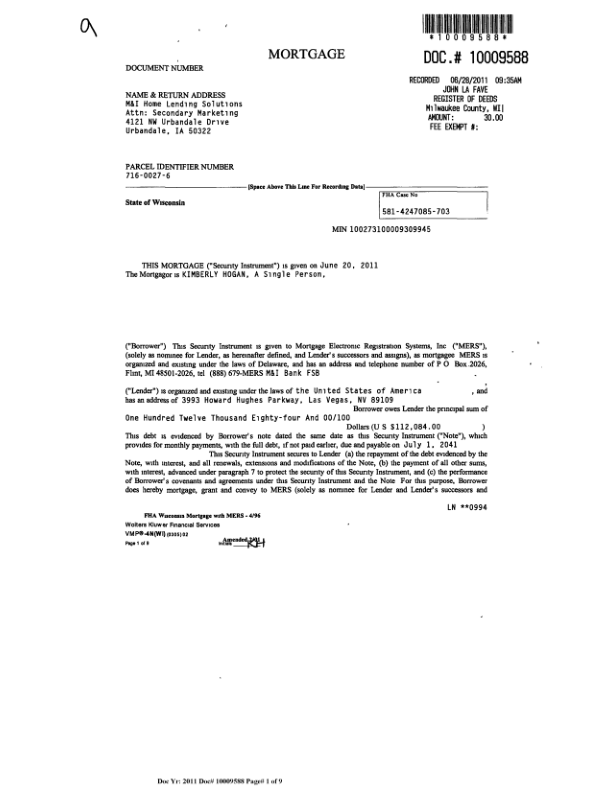

In [7]:
# =======================
# 📌 Step 5: Convert PDF to Image for OCR
# =======================
pix = page.get_pixmap()
img = np.array(Image.frombytes("RGB", [pix.width, pix.height], pix.samples))
display(Image.fromarray(img))

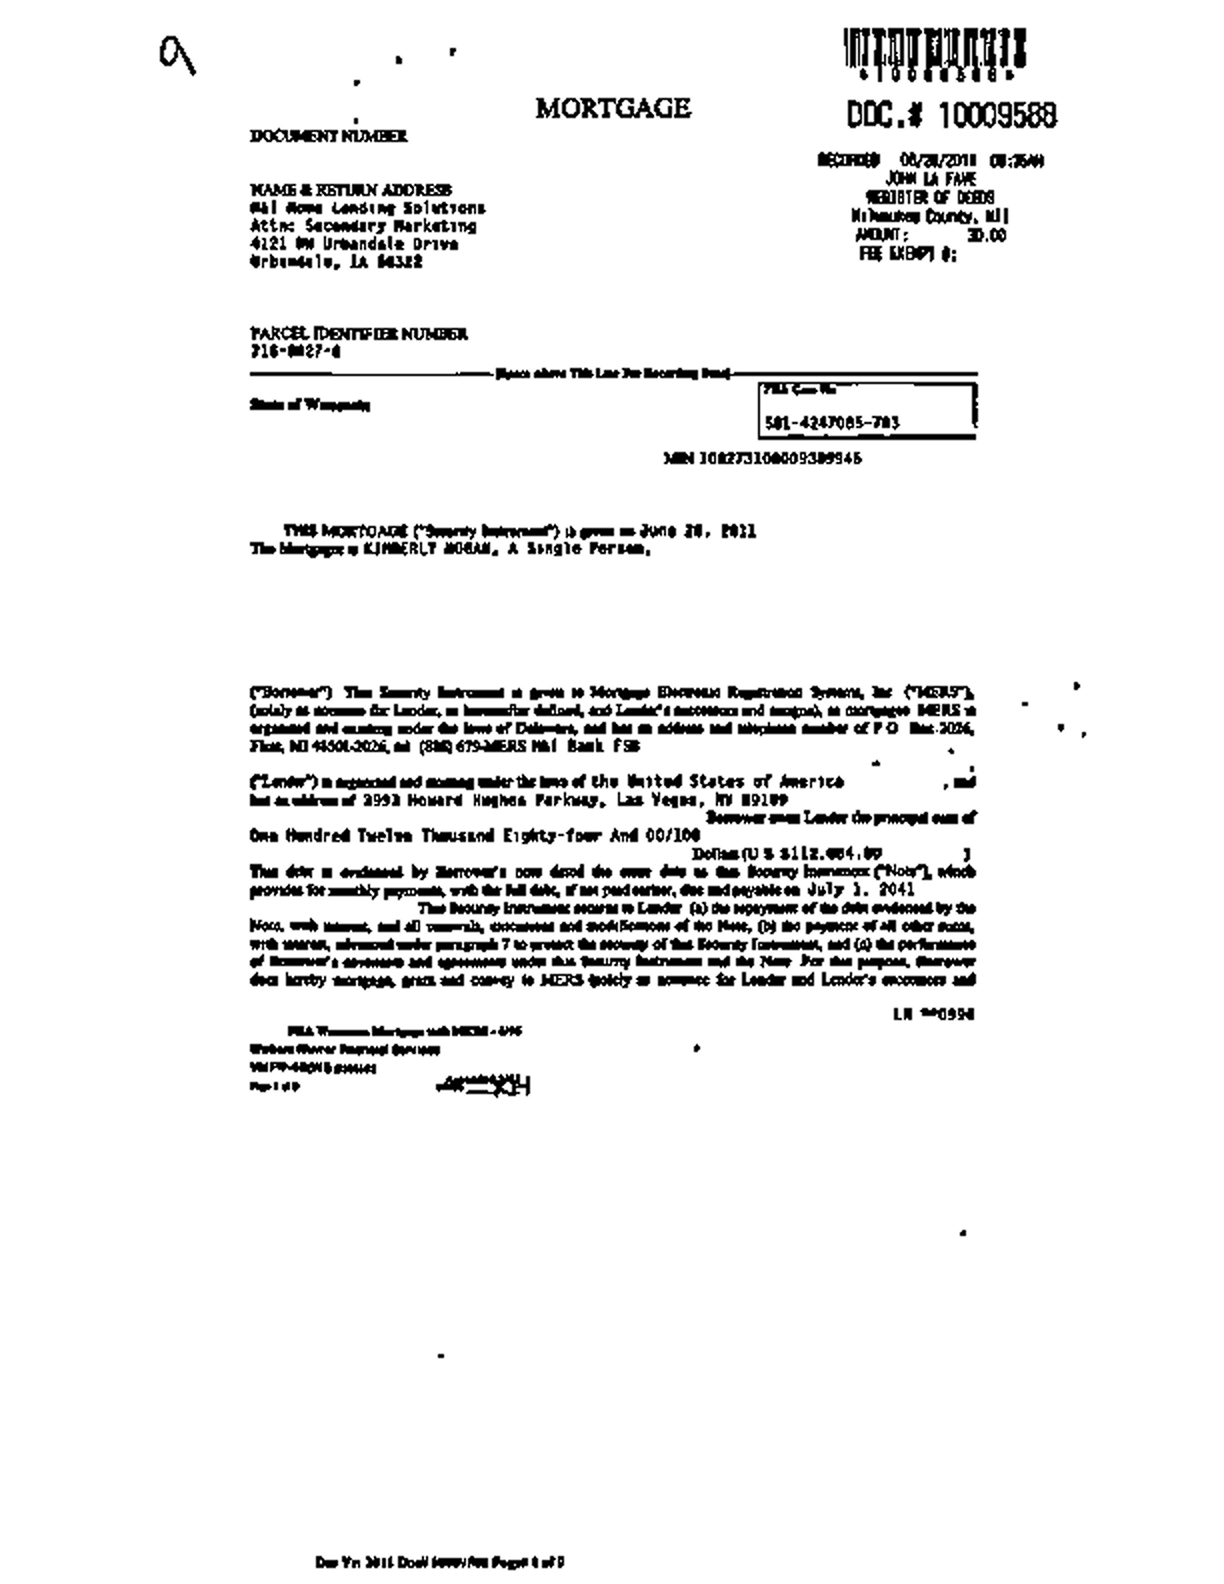

In [8]:

# =======================
# 📌 Step 6: Preprocess Image for Better OCR Accuracy
# =======================

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Adaptive Thresholding for contrast enhancement
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Bilateral Filtering to reduce noise while preserving edges
gray = cv2.bilateralFilter(gray, 9, 75, 75)

# Resize image for better OCR accuracy (Tesseract performs better on larger text)
scale_percent = 200  # Increase image size by 200%
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_CUBIC)

# Show the preprocessed image
display(Image.fromarray(gray))


In [9]:
# =======================
# 📌 Step 7.1: Perform OCR on the Image
# =======================
# Use optimized Tesseract OCR configurations
custom_config = r'--oem 3 -l eng'
ocr_text = pytesseract.image_to_string(gray, config=custom_config)


print("OCR Extracted Text:\n", ocr_text)

# =======================
# 📌 Step 7.2: Extract Bounding Boxes from OCR Output
# =======================

ocr_data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

# Print first 5 extracted words with bounding boxes
for i in range(5):
    print(f"Word: {ocr_data['text'][i]}, BBox: ({ocr_data['left'][i]}, {ocr_data['top'][i]}, {ocr_data['width'][i]}, {ocr_data['height'][i]})")


OCR Extracted Text:
 a NRA

MORTGAGE

DOCSAENT KIMBER DOC.# 10009589

—— ana oo
alae SERIGTRR OF DDS
Seloe cacenseey marketing Wray Cuey a
aorrer iene
TARCEL IDENTIFIER NUMZER
F16-iz7-4@

Pica edkova Ths Lane er Mcriiyl

‘Seats of Ween
5H1-4247065-783

‘MEN 108273100005309545

THEE MORTOALAE (“Seversty Revtrprnamt) (> grr os Fug TH, BOIL
The bhertgage ws KIMMERLT WOEAM, A Sonal Perse,

CBorvemer"} Then Semerty ietrcment ot grevt 00 Sores Ehewean Reprremcs Dread, ee CMERT)
(Golaly 06 orm for Lender, on hewemefter deflood, tx) Lemar’ d tetcoteors and tecagne) of Cooreatee ERS
etpneened tied canter mer Get lowe of Delomers, tid bead am aceite tied epiatah dembiber of PO Mit. 2026, .
Flast, NI 4501-2008, at (SM STSMERS Ma Bah FSB ‘

Cleaner”) m artetcted 003 mcmmag units the me of the Uarted States of America rm

het ta chive of 2992 Howard Hughes Parkway, Las Yeqea, MV BOlUD

Serre ee Levter de pcg cum of
Ona Hondred Twelee Thausand Eigkty-foer And 00/106

Doles (U S $112.604,09 J
‘Tha Ge

In [10]:
# =======================
# 📌 Step 8: Post-OCR Processing & Extracting Key Information
# =======================

import re
import json

# 📌 Step 8.1: Preprocess OCR Text (Cleaning & Formatting)
ocr_text = " ".join(ocr_text.split())  # Remove extra spaces & newlines
ocr_text = re.sub(r'[^a-zA-Z0-9\s,.%-]', '', ocr_text)  # Remove special chars

# 📌 Step 8.2: Fix Common OCR Errors
ocr_text = re.sub(r'\bL0AN\b', 'LOAN', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bM0RTGAGE\b', 'MORTGAGE', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\b1NTEREST\b', 'INTEREST', ocr_text, flags=re.IGNORECASE)


print("Final Cleaned OCR Text:\n", ocr_text)


Final Cleaned OCR Text:
 a NRA MORTGAGE DOCSAENT KIMBER DOC. 10009589  ana oo alae SERIGTRR OF DDS Seloe cacenseey marketing Wray Cuey a aorrer iene TARCEL IDENTIFIER NUMZER F16-iz7-4 Pica edkova Ths Lane er Mcriiyl Seats of Ween 5H1-4247065-783 MEN 108273100005309545 THEE MORTOALAE Seversty Revtrprnamt  grr os Fug TH, BOIL The bhertgage ws KIMMERLT WOEAM, A Sonal Perse, CBorvemer Then Semerty ietrcment ot grevt 00 Sores Ehewean Reprremcs Dread, ee CMERT Golaly 06 orm for Lender, on hewemefter deflood, tx Lemar d tetcoteors and tecagne of Cooreatee ERS etpneened tied canter mer Get lowe of Delomers, tid bead am aceite tied epiatah dembiber of PO Mit. 2026, . Flast, NI 4501-2008, at SM STSMERS Ma Bah FSB  Cleaner m artetcted 003 mcmmag units the me of the Uarted States of America rm het ta chive of 2992 Howard Hughes Parkway, Las Yeqea, MV BOlUD Serre ee Levter de pcg cum of Ona Hondred Twelee Thausand Eigkty-foer And 00106 Doles U S 112.604,09 J Tha Gem mt orxtanwed by Serrowarn pow de

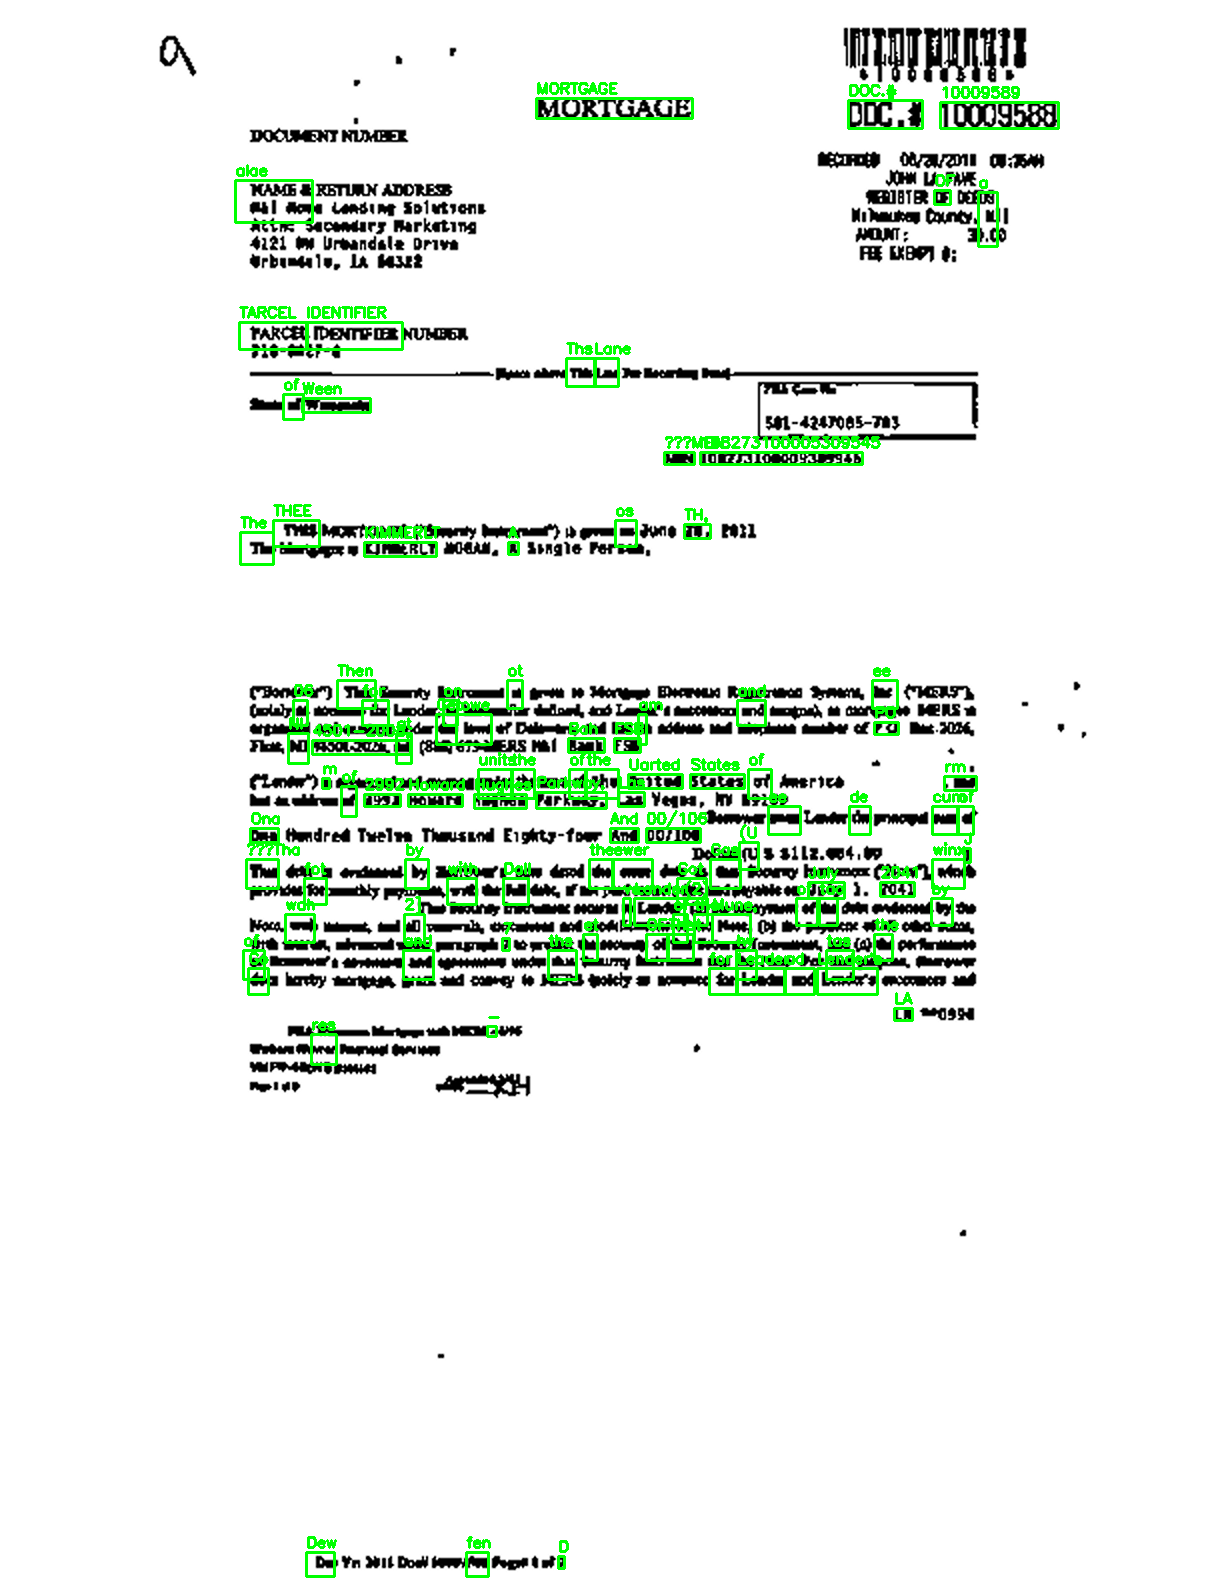

In [11]:
import cv2
from PIL import Image

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Get OpenCV image height for correct y-coordinate transformation
page_height = gray.shape[0]

# Define confidence threshold (ignore low-confidence words)
confidence_threshold = 40

# 📌 Step 9.1: Loop through Extracted OCR Words & Draw Bounding Boxes
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]
    conf = int(ocr_data["conf"][i])  # Convert confidence to int

    # Ignore empty words & low-confidence OCR text
    if not word or conf < confidence_threshold:
        continue

    # Fix y-coordinate to match OpenCV's top-left origin
    #y = page_height - y

    # Draw bounding box
    cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 📌 Step 9.2: Convert Back to RGB & Display the Image
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))





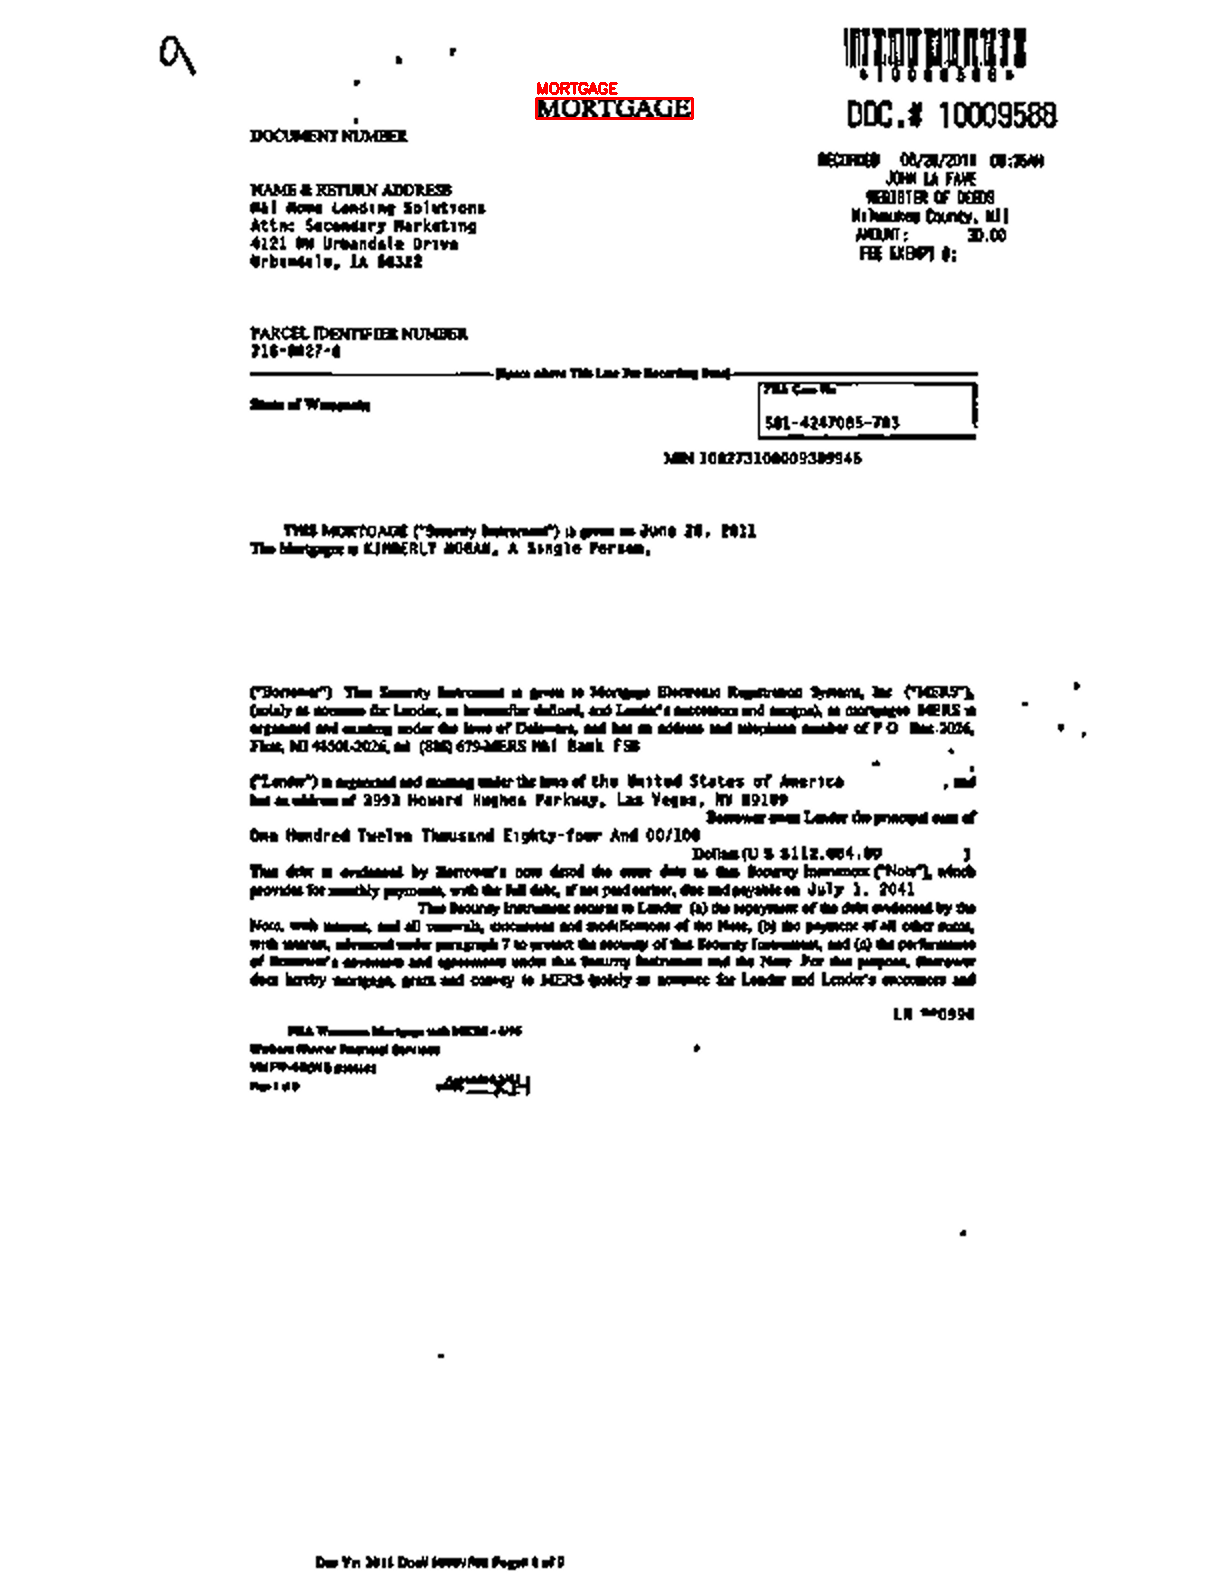

In [12]:
# =======================
# 📌 Step 10: Draw Bounding Boxes on Relevant Key Fields from Mortgage Document
# =======================

import cv2

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Define key fields dynamically based on document content
key_fields = ["MORTGAGE", "NOTE", "LENDER", "PROPERTY ADDRESS", "DATE", "SIGNATURE"]

# Loop through extracted OCR words
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()  # Convert to uppercase for better matching
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:  # Highlight only key fields found in the document
        cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red bounding box
        cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Convert back to RGB for display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))

In [13]:
import json

# Initialize an empty dictionary to store extracted key field data
extracted_data = {}

# Loop through detected words to extract key fields
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:
        extracted_data[word] = {
            "text": word,
            "bounding_box": [x, y, w, h]
        }

# Convert extracted data into JSON format
json_output = json.dumps(extracted_data, indent=4)

# Print structured JSON output
print(json_output)


{
    "MORTGAGE": {
        "text": "MORTGAGE",
        "bounding_box": [
            536,
            98,
            156,
            20
        ]
    }
}
